<a href="https://colab.research.google.com/github/shravyagulaigari/Python-2/blob/main/Python_Day___11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


import pandas as pd
import re

ps=pd.read_csv('/content/gdrive/My Drive/CRT_PYTHON_22BK1A7248/Shopping_data.csv')

Mounted at /content/gdrive


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Before Optimization:
Mean Squared Error: 573.9517746657597
R-squared: -0.16363590679133844

After Optimization:
Mean Squared Error: 573.9517746657597
R-squared: -0.16363590679133844


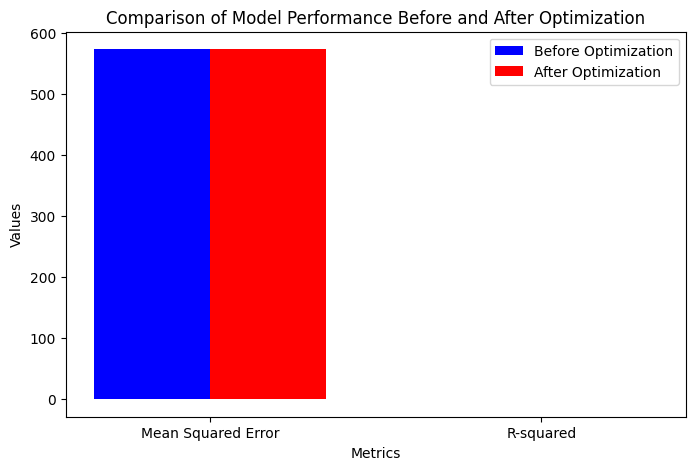

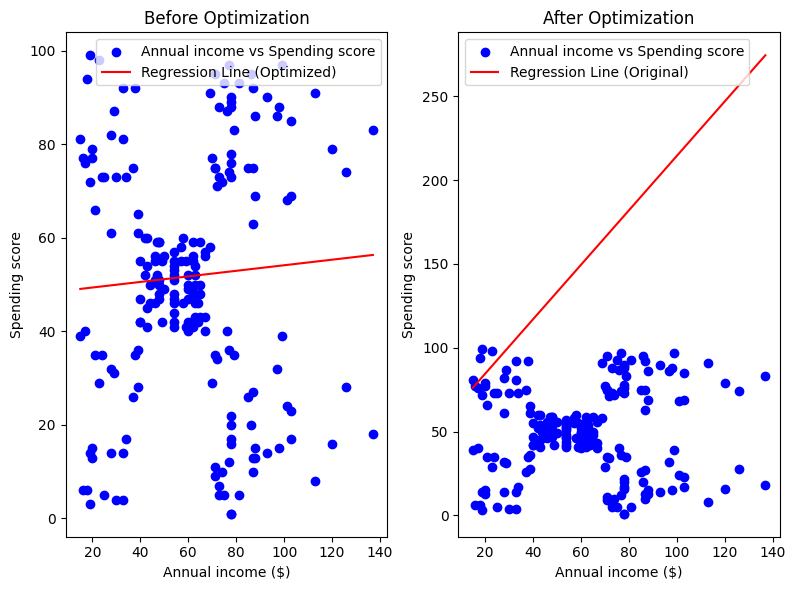

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
ds = pd.read_csv('/content/gdrive/My Drive/CRT_PYTHON_22BK1A7248/Shopping_data.csv')
print(ds.head())

# Define features and target
y = ds['Spending Score (1-100)']
x = ds['Annual Income (k$)'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Before Optimization: Train the model with original data
model.fit(X_train, y_train)

# Predictions
y_pred_before = model.predict(X_test)

# Evaluate the model's performance (before optimization)
mse_before = mean_squared_error(y_test, y_pred_before)
r2_before = r2_score(y_test, y_pred_before)

# Now apply optimization: Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with scaled data
model.fit(X_train_scaled, y_train)

# Predictions after scaling
y_pred_after = model.predict(X_test_scaled)

# Evaluate the model's performance (after optimization)
mse_after = mean_squared_error(y_test, y_pred_after)
r2_after = r2_score(y_test, y_pred_after)

# Print Results
print("Before Optimization:")
print("Mean Squared Error:", mse_before)
print("R-squared:", r2_before)

print("\nAfter Optimization:")
print("Mean Squared Error:", mse_after)
print("R-squared:", r2_after)

# Plotting bar graph for comparison of MSE and R-squared before and after optimization
metrics = ['Mean Squared Error', 'R-squared']
before_values = [mse_before, r2_before]
after_values = [mse_after, r2_after]

x_pos = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
ax.bar(x_pos - bar_width/2, before_values, bar_width, label='Before Optimization', color='blue')
ax.bar(x_pos + bar_width/2, after_values, bar_width, label='After Optimization', color='red')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Model Performance Before and After Optimization')
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

# Visualization of Regression Line (Before and After Optimization)
plt.figure(figsize=(8, 6))

# Before Optimization
plt.subplot(1, 2, 1)
plt.scatter(x, y, color="blue", label="Annual income vs Spending score")
plt.plot(x, model.predict(scaler.transform(x.reshape(-1, 1))), color="red", label="Regression Line (Optimized)")
plt.title("Before Optimization")
plt.xlabel("Annual income ($)")
plt.ylabel("Spending score")
plt.legend()

# After Optimization
plt.subplot(1, 2, 2)
plt.scatter(x, y, color="blue", label="Annual income vs Spending score")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="Regression Line (Original)")
plt.title("After Optimization")
plt.xlabel("Annual income ($)")
plt.ylabel("Spending score")
plt.legend()

plt.tight_layout()
plt.show()